In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

4*x**3 - 3*x**2
[0, 3/4]
12*x**2 - 6*x
0
9/4
-27/256
oo


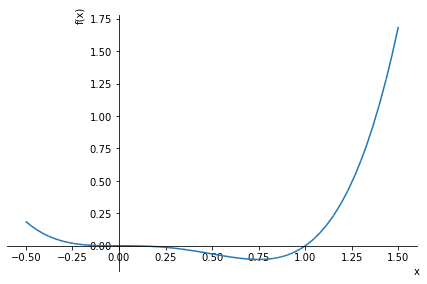

In [2]:
# Let 𝑓(𝑥)=𝑥**4−𝑥**3.

x = sp.Symbol('x')
f = sp.Function("f", real=True)

f = 𝑥**4 - 𝑥**3

# a) Find 𝑓𝑓′(𝑥𝑥) and hence find the critical points of the function.

df = f.diff()
print(df)

eq_df = sp.Eq(df, 0)
sol_df = sp.solve(eq_df)
print(sol_df)

ddf = df.diff()
print(ddf)

# b) Using 𝑓𝑓′′, establish the nature of the critical points (i.e. if they are min, max, or neither).

sol_ddf1 = ddf.subs(x, sol_df[0])
print(sol_ddf1) # sol_ddf1 = 0 == 0 --> not a min and not a max

sol_ddf2 = ddf.subs(x, sol_df[1])
print(sol_ddf2) # sol_ddf2 = 9/4 > 0 --> local minimum

# c) Calculate any local max/min values the function may have.

min_f = sp.minimum(f, x)
print(min_f)

max_f = sp.maximum(f, x)
print(max_f)

sp.plot(f, (x, -0.5, 1.5))

0.5*x**2 + 10*x + 7200
(0.5*x**2 + 10*x + 7200)/x
130.000000000000
(1.0*x + 10)/x - (0.5*x**2 + 10*x + 7200)/x**2
[-120.000000000000, 120.000000000000]
130.000000000000
15600.0000000000


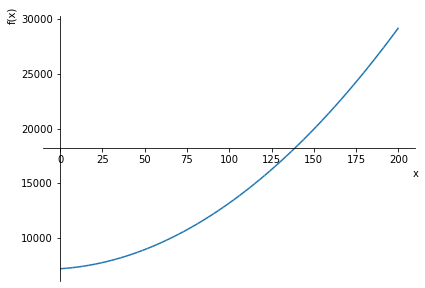

In [3]:
# A manufacturer has determined that the cost 𝐶𝐶 of operating a factory is given by 𝐶𝐶(𝑥𝑥)=0.5*𝑥**2+10*𝑥+7200,where 𝑥𝑥 is the number of units produced.
# Note that the average cost is the ratio of the cost of producing 𝑥𝑥 units and 𝑥𝑥, the number of produced units. C/x
# Once you calculate the minimum average cost, compare it with the minimum cost just for fun

c = sp.Function("c", real=True)
c = 0.5*𝑥**2+10*𝑥+7200
print(c)

# Minimum cost is 7200 - this procudes 0 unit, it costs this much just for the factory exist

avg_c = c/x
print(avg_c)

# At what level of production will the average cost per unit be minimized?

avg_c_min = sp.minimum(avg_c, x, domain = sp.Interval(0, 500))
print(avg_c_min) # 130 per unit

d_avg_c = avg_c.diff()
print(d_avg_c)

eq_d_avg = sp.Eq(d_avg_c, 0)
sol_d_avg = sp.solve(eq_d_avg)
print(sol_d_avg) # 120 units

# What is the minimal average cost per unit produced?
min_avg = avg_c.subs(x, sol_d_avg[1])
print(min_avg) # 130 per unit

min_c = c.subs(x, sol_d_avg[1])
print(min_c) # 15600 total minimum cost

sp.plot(c, (x, 0, 200))

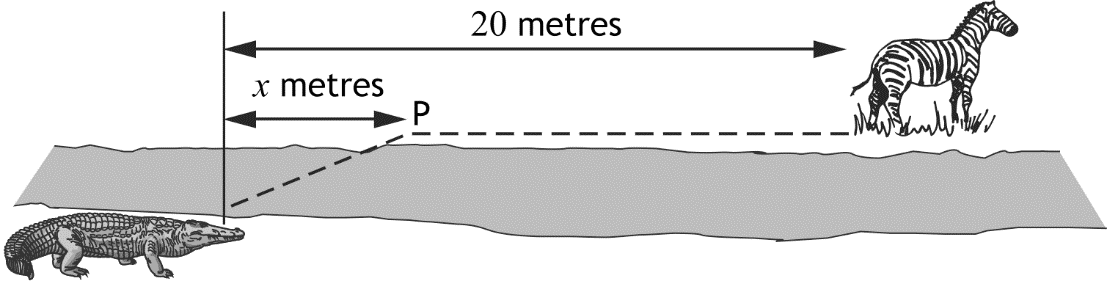

In [18]:
# The time taken, 𝑇𝑇, measured in tenths of a second, for the crocodile to reach its prey is given by 𝑇𝑇(𝑥𝑥)=7*sqrt(36+𝑥**2)+4(20−𝑥)
# 6 m wide

t = sp.Function("t", real=True)
t = 7*sp.sqrt(36+𝑥**2) + 4*(20-𝑥)
print(t)

# a) Calculate the time taken if the crocodile does not travel on land. --> x = 20

no_land = t.subs(x, 20)
print(sp.N(no_land)) # 14*sqrt(109) which is approx. 146.16 tenth of a second --> 14,6 seconds

# b) Calculate the time taken if the crocodile swims the shortest distance possible. --> x = 0

short = t.subs(x, 0)
print(short) # 122 tenths of a second -> 12,2 seconds

# c) Between these two extremes there is one value of 𝑥𝑥 which minimizes the time taken.
# Find this value of 𝑥𝑥 and the minimum possible time. Use Gradient Descent Method with appropriate choice of 𝑥𝑥0 and 𝛼𝛼.

dt = t.diff()
print(dt)

Dt = sp.lambdify(x, dt)
T = sp.lambdify(x, t)

results = pd.DataFrame(columns = ["k", "xk", "t(xk)", "|t'(xk)|"])

# run the algorithm
max_iter = 200
xk = 0
alpha = 0.6
k = 0
tol = 1e-6

while (k < max_iter) and (abs(Dt(xk)) >= tol): # or we could use a for loop
    #add a row i the Dataframe
    row = [k, xk, T(xk), abs(Dt(xk))]
    results.loc[len(results)] = row
    
    #update the iteration
    xk = xk - alpha*Dt(xk)
    k = k+1
    
print(results)

# ultimate value for x = 4.178 meters, and ultimate time is 114.467 tenths of a second --> 11,45 seconds

time = t.subs(x, 4.178)
print(time)

-4*x + 7*sqrt(x**2 + 36) + 80
146.164291124748
122
7*x/sqrt(x**2 + 36) - 4
       k        xk       t(xk)  |t'(xk)|
0    0.0  0.000000  122.000000  4.000000
1    1.0  2.400000  115.635384  1.400265
2    2.0  3.240159  114.772297  0.673831
3    3.0  3.644458  114.563003  0.365987
4    4.0  3.864050  114.499913  0.209904
5    5.0  3.989993  114.478923  0.123832
6    6.0  4.064292  114.471571  0.074212
7    7.0  4.108819  114.468921  0.044882
8    8.0  4.135748  114.467950  0.027291
9    9.0  4.152122  114.467590  0.016648
10  10.0  4.162111  114.467456  0.010176
11  11.0  4.168217  114.467406  0.006227
12  12.0  4.171953  114.467387  0.003814
13  13.0  4.174241  114.467380  0.002337
14  14.0  4.175643  114.467377  0.001432
15  15.0  4.176503  114.467376  0.000878
16  16.0  4.177029  114.467376  0.000538
17  17.0  4.177352  114.467376  0.000330
18  18.0  4.177550  114.467376  0.000202
19  19.0  4.177671  114.467376  0.000124
20  20.0  4.177746  114.467376  0.000076
21  21.0  4.177791  114

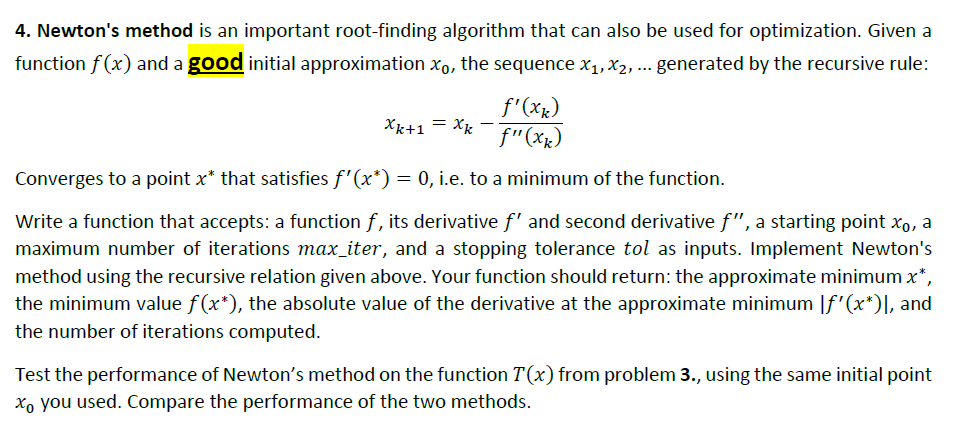

In [19]:
# Newton's method

def newtons_method(f, df, ddf, x0, max_iter = 500, tol = 1e-6):
    
    res = pd.DataFrame(columns = ["k", "xk", "f(xk)", "|f'(xk)|"])
    
    k = 0
    xk = x0
    
    while (k < max_iter) and (abs(df(xk)) >= tol):
        row = [k, xk, f(xk), abs(df(xk))]
        res.loc[len(res)] = row
        
        xk = xk - df(xk)/ddf(xk)
        k += 1
        
    return res

In [20]:
ddt = dt.diff()
print(ddt)

DDt = sp.lambdify(x, ddt)

-7*x**2/(x**2 + 36)**(3/2) + 7/sqrt(x**2 + 36)


In [21]:
newtons_method(T, Dt, DDt, 0)

,k,xk,f(xk),|f'(xk)|
0,0.0,0.000000,122.000000,4.000000
1,1.0,3.428571,114.659261,0.527027
2,2.0,4.118751,114.468508,0.038380
3,3.0,4.177457,114.467376,0.000262


In [ ]:
# Newton's method is way faster in finding the result